In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


file_path = 'HBITCNER.xlsx'  
data = pd.read_excel(file_path)
data = data.iloc[::-1].reset_index(drop=True)


data['log_return'] = np.log(data['PX_LAST'] / data['PX_LAST'].shift(1))
data = data.dropna()
data['log_return_square'] = data['log_return']**2

In [2]:
data

,Date,PX_LAST,log_return,log_return_square
1,2020-01-27,4346.53,0.057789,0.003340
2,2020-01-28,4384.53,0.008705,0.000076
3,2020-01-29,4548.77,0.036774,0.001352
4,2020-01-30,4643.07,0.020519,0.000421
5,2020-01-31,4504.69,-0.030257,0.000915
...,...,...,...,...
1009,2024-02-22,19059.70,0.020852,0.000435
1010,2024-02-23,18710.79,-0.018476,0.000341
1011,2024-02-26,19990.72,0.066168,0.004378
1012,2024-02-27,20833.16,0.041278,0.001704


In [3]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from arch import arch_model

garch_data = data['log_return']
train_size = int(len(garch_data) * 0.8)
train, test = garch_data.iloc[:train_size],  garch_data.iloc[train_size:]

# Construct and fit the EGARCH(1,1) model
model = arch_model(train, vol='GARCH', p=1, q=1)
model_fit = model.fit()

# Initialize lists to store the forecasts
g_forecasted_variance = []
g_forecasted_mean = []

# Generate forecasts using a rolling window
for i in range(train_size, len(garch_data)):
    # Fit the model on data up to the ith observation
    temp_model = arch_model(garch_data.iloc[:i], vol='GARCH', p=1, q=1)
    temp_model_fit = temp_model.fit(disp='off', last_obs=i)
    
    # Forecast the next step
    temp_forecast = temp_model_fit.forecast(horizon=1)
    forecasted_mean_value = temp_forecast.mean.iloc[-1].item()
    forecasted_variance_value = temp_forecast.variance.iloc[-1].item()
    
    g_forecasted_mean.append(forecasted_mean_value)
    g_forecasted_variance.append(forecasted_variance_value)

# Create pandas Series from the forecasted values, using the test set index
g_forecasted_mean = pd.Series(g_forecasted_mean, index=garch_data.iloc[train_size:].index)
g_forecasted_variance = pd.Series(g_forecasted_variance, index=garch_data.iloc[train_size:].index)

# Calculating the actual variance (square of log returns)
actual_variance = test**2




/Users/chancelee/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001993. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/chancelee/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001993. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/chancelee/anaconda3/lib/python3.11/site-package

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1292568.0640997689
Iteration:      2,   Func. Count:     17,   Neg. LLF: 15540.330541561056
Iteration:      3,   Func. Count:     27,   Neg. LLF: 1398.0789986218128
Iteration:      4,   Func. Count:     36,   Neg. LLF: 350559.5105594911
Iteration:      5,   Func. Count:     46,   Neg. LLF: -1363.245487517555
Iteration:      6,   Func. Count:     53,   Neg. LLF: -1304.3265305614855
Iteration:      7,   Func. Count:     60,   Neg. LLF: -1370.4473285799659
Iteration:      8,   Func. Count:     66,   Neg. LLF: -1387.4598763702168
Iteration:      9,   Func. Count:     71,   Neg. LLF: -1387.4635627109187
Iteration:     10,   Func. Count:     76,   Neg. LLF: -1387.463667290912
Iteration:     11,   Func. Count:     81,   Neg. LLF: -1387.4636824954507
Iteration:     12,   Func. Count:     85,   Neg. LLF: -1387.46368249546
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1387.4636824954507
           

/Users/chancelee/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001953. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/chancelee/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001955. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/chancelee/anaconda3/lib/python3.11/site-package

/Users/chancelee/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001892. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/chancelee/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00189. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/chancelee/anaconda3/lib/python3.11/site-packages

/Users/chancelee/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00184. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/chancelee/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001838. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/chancelee/anaconda3/lib/python3.11/site-packages

/Users/chancelee/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001807. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/chancelee/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001806. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/chancelee/anaconda3/lib/python3.11/site-package

/Users/chancelee/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001777. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/chancelee/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001775. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/chancelee/anaconda3/lib/python3.11/site-package

In [5]:
import pandas as pd
from arch import arch_model

egarch_data = data['log_return']
train_size = int(len(egarch_data) * 0.8)
train, test = egarch_data.iloc[:train_size],  egarch_data.iloc[train_size:]
# Construct and fit the EGARCH(1,1) model
model = arch_model(train, vol='EGARCH', p=1, q=1)
model_fit = model.fit()

# Initialize lists to store the forecasts
forecasted_variance = []
forecasted_mean = []

# Generate forecasts using a rolling window
for i in range(train_size, len(egarch_data)):
    # Fit the model on data up to the ith observation
    temp_model = arch_model(egarch_data.iloc[:i], vol='EGARCH', p=1, q=1)
    temp_model_fit = temp_model.fit(disp='off', last_obs=i)
    
    # Forecast the next step
    temp_forecast = temp_model_fit.forecast(horizon=1)
    forecasted_mean_value = temp_forecast.mean.iloc[-1].item()
    forecasted_variance_value = temp_forecast.variance.iloc[-1].item()
    
    forecasted_mean.append(forecasted_mean_value)
    forecasted_variance.append(forecasted_variance_value)

# Create pandas Series from the forecasted values, using the test set index
forecasted_mean = pd.Series(forecasted_mean, index=egarch_data.iloc[train_size:].index)
forecasted_variance = pd.Series(forecasted_variance, index=egarch_data.iloc[train_size:].index)


/Users/chancelee/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001993. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/chancelee/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001993. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/chancelee/anaconda3/lib/python3.11/site-package

Iteration:      1,   Func. Count:      6,   Neg. LLF: 24882.073605240417
Iteration:      2,   Func. Count:     18,   Neg. LLF: -369.7392634578295
Iteration:      3,   Func. Count:     26,   Neg. LLF: 1046382682.4138583
Iteration:      4,   Func. Count:     35,   Neg. LLF: -1335.339850026368
Iteration:      5,   Func. Count:     41,   Neg. LLF: -1334.0300809378464
Iteration:      6,   Func. Count:     47,   Neg. LLF: -1378.0597667216014
Iteration:      7,   Func. Count:     53,   Neg. LLF: -1383.57913779639
Iteration:      8,   Func. Count:     59,   Neg. LLF: -1383.8285675683117
Iteration:      9,   Func. Count:     64,   Neg. LLF: -1383.8293698773928
Iteration:     10,   Func. Count:     69,   Neg. LLF: -1383.8297496678329
Iteration:     11,   Func. Count:     74,   Neg. LLF: -1383.8298121274233
Iteration:     12,   Func. Count:     79,   Neg. LLF: -1383.8298140727347
Iteration:     13,   Func. Count:     83,   Neg. LLF: -1383.8298140715065
Optimization terminated successfully    (Exi

/Users/chancelee/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001964. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/chancelee/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001962. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/chancelee/anaconda3/lib/python3.11/site-package

/Users/chancelee/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001924. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/chancelee/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001922. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/chancelee/anaconda3/lib/python3.11/site-package

/Users/chancelee/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001874. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/chancelee/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001874. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/chancelee/anaconda3/lib/python3.11/site-package

/Users/chancelee/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001833. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/chancelee/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001831. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/chancelee/anaconda3/lib/python3.11/site-package

/Users/chancelee/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001808. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/chancelee/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001806. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/chancelee/anaconda3/lib/python3.11/site-package

/Users/chancelee/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001775. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/chancelee/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001774. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/chancelee/anaconda3/lib/python3.11/site-package

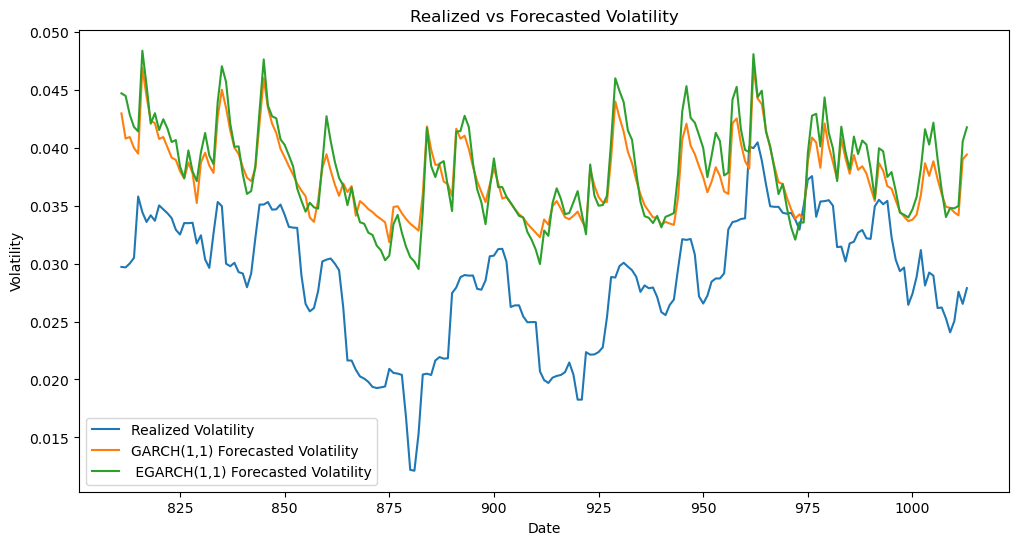

GARCH(1,1) - MSE:  0.00009584776550677813 , RMSE:  0.009790187204889299
EGARCH(1,1) - MSE:  0.00010436589072464294 , RMSE:  0.010215962545185987


In [6]:
import matplotlib.pyplot as plt

# Calculate realized volatility (rolling standard deviation of actual data)
# Adjust the window size as needed
window_size = 21  # example window size
realized_volatility = data['log_return'].rolling(window=window_size).std()

# Select the relevant period for comparison
realized_volatility = realized_volatility[train_size:]

# Ensure the forecasted data and realized volatility have the same length
garch_forecasted_volatility = g_forecasted_variance**0.5
egarch_forecasted_volatility = forecasted_variance**0.5



# Calculate MSE and RMSE for GARCH(1,1)
mse_garch = ((realized_volatility-garch_forecasted_volatility)**2).mean()
rmse_garch = np.sqrt(mse_garch)

# Calculate MSE and RMSE for EGARCH(1,1)
mse_egarch = ((realized_volatility-egarch_forecasted_volatility)**2).mean()
rmse_egarch = np.sqrt(mse_egarch)


plt.figure(figsize=(12, 6))
plt.plot(realized_volatility, label='Realized Volatility')
plt.plot(garch_forecasted_volatility, label='GARCH(1,1) Forecasted Volatility')
plt.plot(egarch_forecasted_volatility, label=' EGARCH(1,1) Forecasted Volatility')



plt.title('Realized vs Forecasted Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error
import numpy as np


print("GARCH(1,1) - MSE: ",  np.format_float_positional(mse_garch, trim='-') , ", RMSE: ", rmse_garch)
print("EGARCH(1,1) - MSE: ", mse_egarch, ", RMSE: ", rmse_egarch)



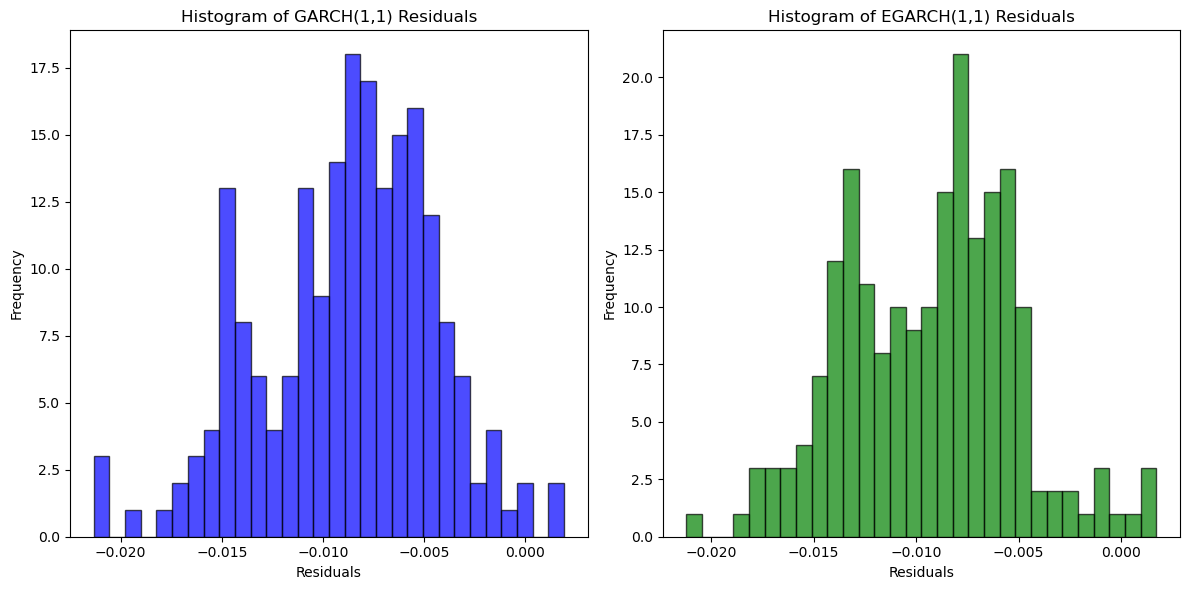

In [7]:
import matplotlib.pyplot as plt

# Calculate residuals for both models
garch_residuals = realized_volatility - garch_forecasted_volatility
egarch_residuals = realized_volatility - egarch_forecasted_volatility

# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for GARCH(1,1) residuals
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.hist(garch_residuals.dropna(), bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of GARCH(1,1) Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Histogram for EGARCH(1,1) residuals
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.hist(egarch_residuals.dropna(), bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title('Histogram of EGARCH(1,1) Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
